<a href="https://colab.research.google.com/github/OswaldCc/Chest-X-ray-Pneumonia-Detection-with-CNNs/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE CLASSIFICATION WITH DEEP LEARNING


## 1. Business understanding


### 1.1 Data Analytic Question & Problem Statement

To improve diagnosis of pneumonia using convolutional neural networks.


### 1.2 Problem Context
Pneumonia is a serious lung condition that can be brought on by bacteria, viruses, or fungus. When someone has pneumonia, the alveoli (air sacs) are filled with fluid and pus, which makes breathing unpleasant, difficult, and restricts oxygen intake (reduced oxygen saturation).
According to the WHO, pneumonia caused 14% of all deaths among children under the age of five in 2019. Both young people and the elderly are susceptible.
A patient's clinical examination is used to diagnose pneumonia.

Machine learning in healthcare reduces the possibility of doing an improper examination. Therefore, a good solutio would be to put into practice a methodology that would enable detecting pneumonia more precisely utilizing chest X-ray pictures. As a machine learning algorithm would sift through a vast amount of data to learn the most likely diagnosis, this would give patients more confidence in the diagnosis.

### 1.3 Metric of Success
The algorithm will be considered a success if the predictions made by it have a:

Recall above 95%
Accuracy of 90% - 96%
The task is to build a model that can classify whether a given patient has pneumonia given their chest x-ray image.

Since this is an Image Classification problem, Deep Learning is the ideal solving method.


## 2. Data Understanding

The medical dataset contains a set of x-ray images of pediatric patients. 
The images are of patients who have pneumonia and those who don't.

Chest X-ray images were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou, China. All chest X-ray imaging were performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

The final data is in two classes, Normal and Pneumonia. This dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia). The data was further divided into three folders of  train, test and validation, each with two classes; normal and pneumonia.

## 3. Project Plan

1. Load and Pre-process the data.
2. Define the trained generator, validation generator, and test generator.
3. Build a baseline model.
4. Tune iterative models.
5. Challenge the solution with Transfer Learning . 
6. Evaluate the model with the test images.

## 4. Loading the Data

### 4.1 Loading the Libraries

Connecting to Google drive and Importing all the necessary Libraries | Modules.

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import all relevant libraries

import numpy as np 
import os, shutil

import time

import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import optimizers, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG19, MobileNet, resnet50
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, \
                                                 array_to_img
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, MaxPooling2D,\
                                    Conv2D, Flatten, Activation, Dropout, Rescaling

import keras
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

from sklearn.metrics import recall_score, accuracy_score


### 4.2 Loading the Data

The data was loaded using `os.listdir` method

In [3]:
# printing the contents of the chest_xray folder 

print(os.listdir('/content/drive/Shareddrives/Avengers/chest_xray'))

['test', 'val', 'train']


Stored the data for both normal and pneumonia x-ray images into variables for easy access. 

This was done for both the train and test data.

In [4]:
# storing the directory paths as variables

train_norm_dir = '/content/drive/Shareddrives/Avengers/chest_xray/train/NORMAL'
train_pneu_dir = '/content/drive/Shareddrives/Avengers/chest_xray/train/PNEUMONIA'

test_norm_dir = '/content/drive/Shareddrives/Avengers/chest_xray/test/NORMAL'
test_pneu_dir = '/content/drive/Shareddrives/Avengers/chest_xray/test/PNEUMONIA'

A list of images in the directories was then created.

In [5]:
# store train normal xrays and pneumonia xrays as variables.

train_norm_images = os.listdir(train_norm_dir)
train_pneu_images = os.listdir(train_pneu_dir)

# store train normal xrays and pneumonia x-rays as variables.

test_norm_images = os.listdir(test_norm_dir)
test_pneu_images = os.listdir(test_pneu_dir)

### 4.3 Previewing the data

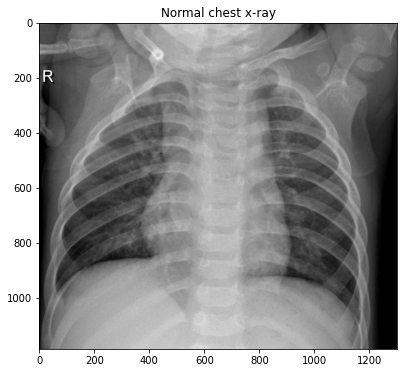

In [6]:
# Display an image from the train NORMAL folder.


img_name_normal = '/' + train_norm_images[3]
normal_lung = load_img(train_norm_dir + img_name_normal)

# normal chest x-ray
plt.figure(figsize=(8, 6))
plt.imshow(normal_lung)
plt.title('Normal chest x-ray')

plt.show()

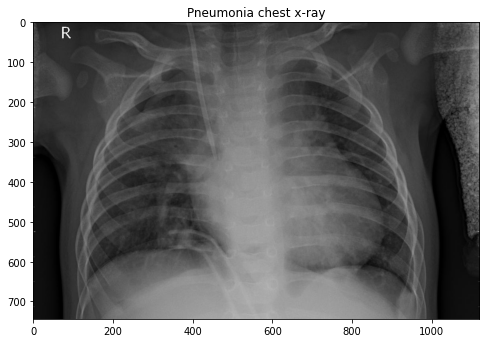

In [7]:
# Display an image from the train PNEUMONIA folder.

img_name_pneumonia = '/' + train_pneu_images[3]
pneumonia_lung = load_img(train_pneu_dir + img_name_pneumonia)

# pneumonia chest x-ray
plt.figure(figsize=(8, 6))
plt.imshow(pneumonia_lung)
plt.title('Pneumonia chest x-ray')

plt.show()

## 5. Exploring the Data

Plotted the class distributions to further understand the data.

### 5.1 Training Set

In [8]:
# combining all the training data

total_train = train_norm_images + train_pneu_images
print('Total train data size is:', np.shape(total_train)[0])

Total train data size is: 5226


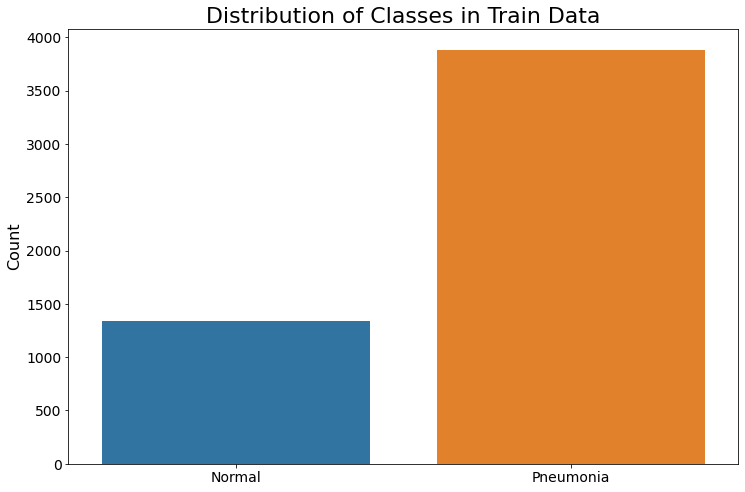


Total count of normal chest x-rays: 1341
----------------------------------------------------------------------------------
Total count of pneumonia chest x-rays: 3885


In [9]:
# creating countplot for total_counts_train

total_counts_train = []
pneu_len_train = 0
norm_len_train = 0

for i in total_train:
    if i[0] == 'p':
        total_counts_train.append('Pneumonia')
        pneu_len_train += 1
    elif i[0] == 'N' or i[0] == 'I':
        total_counts_train.append('Normal')
        norm_len_train += 1

plt.figure(figsize=(12, 8))

title_font_dict = {'size': 22}
labels_font_dict = {'size': 16}

sns.countplot(x=total_counts_train)

plt.ylabel('Count', labels_font_dict)
plt.xticks(fontsize = 14 )
plt.yticks(fontsize = 14 )

plt.title('Distribution of Classes in Train Data', title_font_dict)
plt.show()

print('\nTotal count of normal chest x-rays: {}'.format(norm_len_train))
print('----------------------------------------------------------------------------------')
print('Total count of pneumonia chest x-rays: {}'.format(pneu_len_train))

It can be noted that the training data is imbalanced at a ratio of ~ 1:3

### 5.2 Test Set

In [10]:
# combining all the test data 

total_test = test_norm_images + test_pneu_images
print('Total test data size is:', np.shape(total_test)[0])

Total test data size is: 624


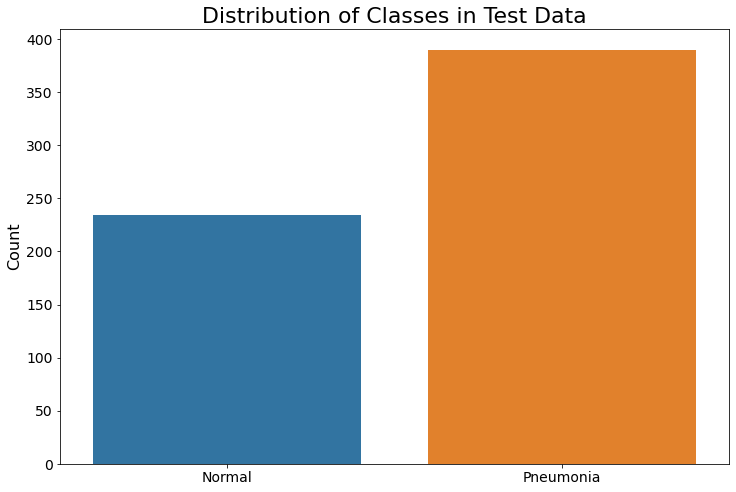


Total count of normal chest x-rays: 234
----------------------------------------------------------------------------------
Total count of pneumonia chest x-rays: 390


In [11]:
# creating countplot for total_counts_test

total_counts_test= []
pneu_len_test = 0
norm_len_test = 0

for i in total_test:
    if i[0] == 'p':
        total_counts_test.append('Pneumonia')
        pneu_len_test += 1
    elif i[0] == 'N' or i[0] == 'I':
        total_counts_test.append('Normal')
        norm_len_test += 1
        
plt.figure(figsize=(12, 8))

sns.countplot(x=total_counts_test)

plt.ylabel('Count', labels_font_dict)
plt.xticks(fontsize = 14 )
plt.yticks(fontsize = 14 )

plt.title('Distribution of Classes in Test Data', title_font_dict)
plt.show()

print('\nTotal count of normal chest x-rays: {}'.format(norm_len_test))
print('----------------------------------------------------------------------------------')
print('Total count of pneumonia chest x-rays: {}'.format(pneu_len_test))

The test data has an imbalance of ratio ~ 1:2

## 6. Preprocessing

### 6.1 Reshaping and Normalizing the Data

Reshaping is important for pixel uniformity in the images, while normalization makes computations efficient by reducing values between 0 to 1. This will be achieved using the `ImageDataGenerator`.

In [12]:
# store test and train directory paths as variables

train_dir = '/content/drive/Shareddrives/Avengers/chest_xray/train'
test_dir = '/content/drive/Shareddrives/Avengers/chest_xray/test'

In [13]:
# setting some global variables

image_height = 156
image_width = 156

input_shape = (image_height, image_width, 3)

In [14]:
# rescaling all images

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # this is the target directory for train data
        train_dir,
        # all images will be resized to 156*156 pixels
        target_size = (image_height, image_width),
        batch_size = len(total_train),
        # using binary labels because target is binary
        class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(
        # this is the target directory for test data
        test_dir,
        # all images will be resized to 156*156 pixels
        target_size = (image_height, image_width),
        batch_size = len(total_test),
        # using binary labelsbecause target is binary
        class_mode = 'binary')

Found 5226 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [15]:
# creating preprocessed datasets

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

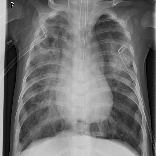

In [16]:
# viewing an xray from the new dataset.
array_to_img(train_images[10])

In [17]:
# viewing the labels
train_labels

array([0., 1., 1., ..., 0., 1., 1.], dtype=float32)

In [18]:
# previewing shape of preprocessed data

print('The new train shape is:', train_images.shape)
print('The new test shape is:', test_images.shape)

The new train shape is: (5226, 156, 156, 3)
The new test shape is: (624, 156, 156, 3)


In [19]:
# identifying normal and pneumonia label notations

train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [20]:
# defining the number of classes 

num_classes = 1

## 7. Implementing the Solution

The identified solution to the problem statement is modelling the given data. Given that this is an image classification problem, Convolutional Neural Networks (CNN) would be ideal as they have better performance compared to other neural networks.

In [21]:
def plotting_visualizations(fitted_model):
    """
    Takes in a fitted model and returns a plot of all scores used in said model.
    """

    fig, ax = plt.subplots(1, 3, figsize=(28, 8))
    ax = ax.ravel()

    for i, score in enumerate(['recall', 'accuracy', 'loss']):
        if max(fitted_model.history[score]) >= 0.6:
            # Plot for train scores
            ax[i].plot(fitted_model.history[score])
            # plot for val/test scores
            ax[i].plot(fitted_model.history['val_' + score])

            ax[i].set_title('Model {}'.format(score).title(), title_font_dict)
            ax[i].set_xlabel('Epochs', labels_font_dict)
            ax[i].set_ylabel(score, labels_font_dict)
            ax[i].set_ylim([0.6, max(fitted_model.history[score]) + 0.05])

            ax[i].legend(['train', 'val']) 

        elif max(fitted_model.history[score]) < 0.6:
            # Plot for train scores
            ax[i].plot(fitted_model.history[score])
            # plot for val/test scores
            ax[i].plot(fitted_model.history['val_' + score])

            ax[i].set_title('Model {}'.format(score).title(), title_font_dict)
            ax[i].set_xlabel('Epochs', labels_font_dict)
            ax[i].set_ylabel(score, labels_font_dict)
            ax[i].set_ylim(0)

            ax[i].legend(['train', 'val']) 


### 7.1 Baseline Model

In [45]:
# instantiating a baseline model

baseline_model = Sequential()

In [46]:
# adding layers to the baseline model

baseline_model.add(Input(shape = input_shape))

baseline_model.add(Conv2D(32, (3, 3), activation='relu'))
baseline_model.add(MaxPooling2D(pool_size=(2, 2)))

baseline_model.add(Flatten())
baseline_model.add(Dense(64, activation='relu'))

baseline_model.add(Dense(num_classes, activation='sigmoid'))

In [47]:
# compiling the baseline model

baseline_model.compile(optimizer ='adam',
                       loss = "binary_crossentropy",
                       metrics = [tf.keras.metrics.Recall(name = 'recall'), 
                                  'accuracy']
                       )


In [48]:
# fit baseline model

base_start = time.time()

base_result = baseline_model.fit(train_images, 
                                 train_labels, 
                                 epochs = 10, 
                                 batch_size = 32, 
                                 validation_split = 0.2 
                                 )


Epoch 1/10
131/131 [==============================] - 4s 27ms/step - loss: 0.8278 - recall: 0.9094 - accuracy: 0.8237 - val_loss: 0.1182 - val_recall: 0.9885 - val_accuracy: 0.9618
Epoch 2/10
131/131 [==============================] - 3s 24ms/step - loss: 0.1241 - recall: 0.9720 - accuracy: 0.9533 - val_loss: 0.0759 - val_recall: 0.9757 - val_accuracy: 0.9780
Epoch 3/10
131/131 [==============================] - 3s 24ms/step - loss: 0.0869 - recall: 0.9832 - accuracy: 0.9720 - val_loss: 0.0709 - val_recall: 0.9732 - val_accuracy: 0.9751
Epoch 4/10
131/131 [==============================] - 3s 24ms/step - loss: 0.0599 - recall: 0.9855 - accuracy: 0.9789 - val_loss: 0.0471 - val_recall: 0.9885 - val_accuracy: 0.9857
Epoch 5/10
131/131 [==============================] - 3s 24ms/step - loss: 0.0494 - recall: 0.9907 - accuracy: 0.9835 - val_loss: 0.0582 - val_recall: 0.9987 - val_accuracy: 0.9761
Epoch 6/10
131/131 [==============================] - 3s 24ms/step - loss: 0.0312 - recall: 0.9

In [49]:
base_stop = time.time()
print(f'Time taken to fit the baseline model was {round(base_stop - base_start, 3)} seconds')

Time taken to fit the baseline model was 42.33 seconds


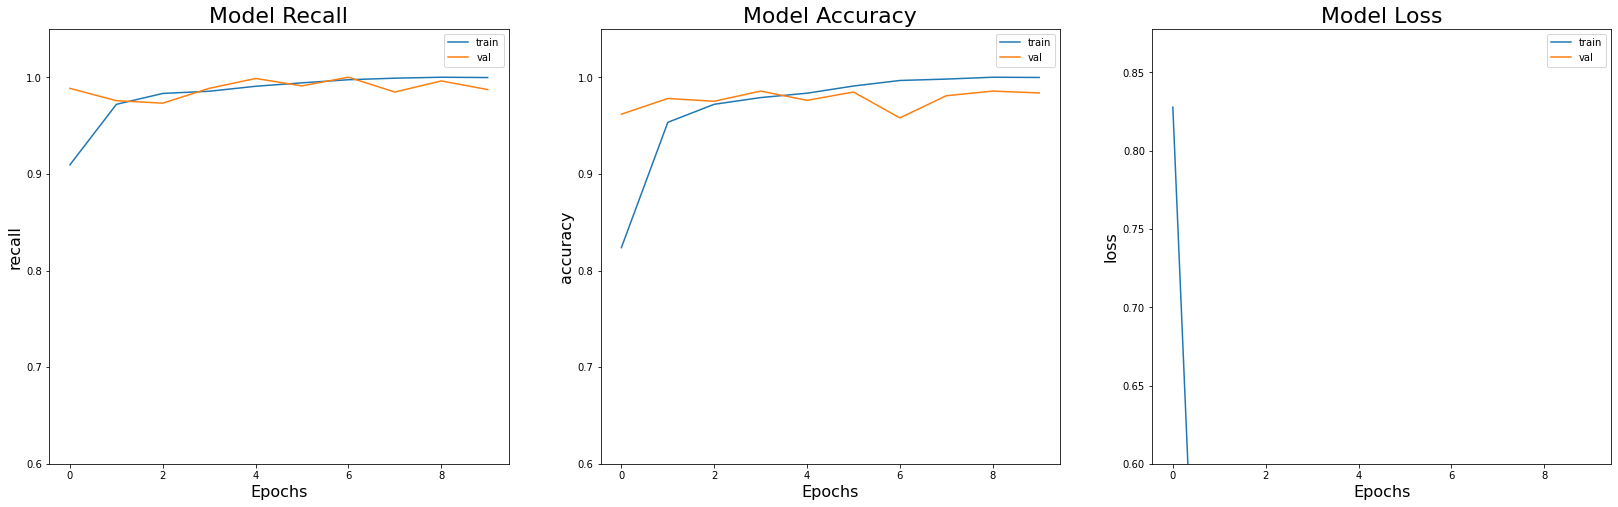

In [50]:
plotting_visualizations(base_result)

The baseline model had a great performance with:

      Runtime = 42.852 seconds

      Recall: Train - 100%, 
              Validation - ~98%

      loss: Train - 0.0009648, 
            Validation - 0.0839
      
      Accuracy: Train - 100%, 
                Validation - ~97%

The data used has an imbalance, dealing with it may improve the modelling results.

### 7.2 Tuned Baseline Model

In [28]:
# create preprocessing layers for data augmentation 

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [29]:
# augment the train dataset

augmented_image = data_augmentation(train_images)

In [30]:
# fit the tuned baseline model

aug_start = time.time()

base_tuned_result = baseline_model.fit(augmented_image, 
                                 train_labels , 
                                 epochs = 10, 
                                 batch_size = 32, 
                                 validation_split = 0.2 
                                 )
aug_stop = time.time()
print(f'Time taken to fit the tuned baseline model was {round(aug_stop - aug_start, 3)} seconds')

Epoch 1/10
131/131 [==============================] - 3s 25ms/step - loss: 0.5639 - recall: 0.8720 - accuracy: 0.7763 - val_loss: 0.3262 - val_recall: 0.9604 - val_accuracy: 0.8671
Epoch 2/10
131/131 [==============================] - 3s 23ms/step - loss: 0.2602 - recall: 0.9349 - accuracy: 0.8921 - val_loss: 0.3573 - val_recall: 0.9860 - val_accuracy: 0.8499
Epoch 3/10
131/131 [==============================] - 3s 23ms/step - loss: 0.1946 - recall: 0.9529 - accuracy: 0.9187 - val_loss: 0.2411 - val_recall: 0.9144 - val_accuracy: 0.9015
Epoch 4/10
131/131 [==============================] - 3s 23ms/step - loss: 0.1236 - recall: 0.9703 - accuracy: 0.9545 - val_loss: 0.2517 - val_recall: 0.9757 - val_accuracy: 0.8948
Epoch 5/10
131/131 [==============================] - 3s 23ms/step - loss: 0.0766 - recall: 0.9848 - accuracy: 0.9725 - val_loss: 0.2902 - val_recall: 0.8825 - val_accuracy: 0.8901
Epoch 6/10
131/131 [==============================] - 3s 23ms/step - loss: 0.0512 - recall: 0.9

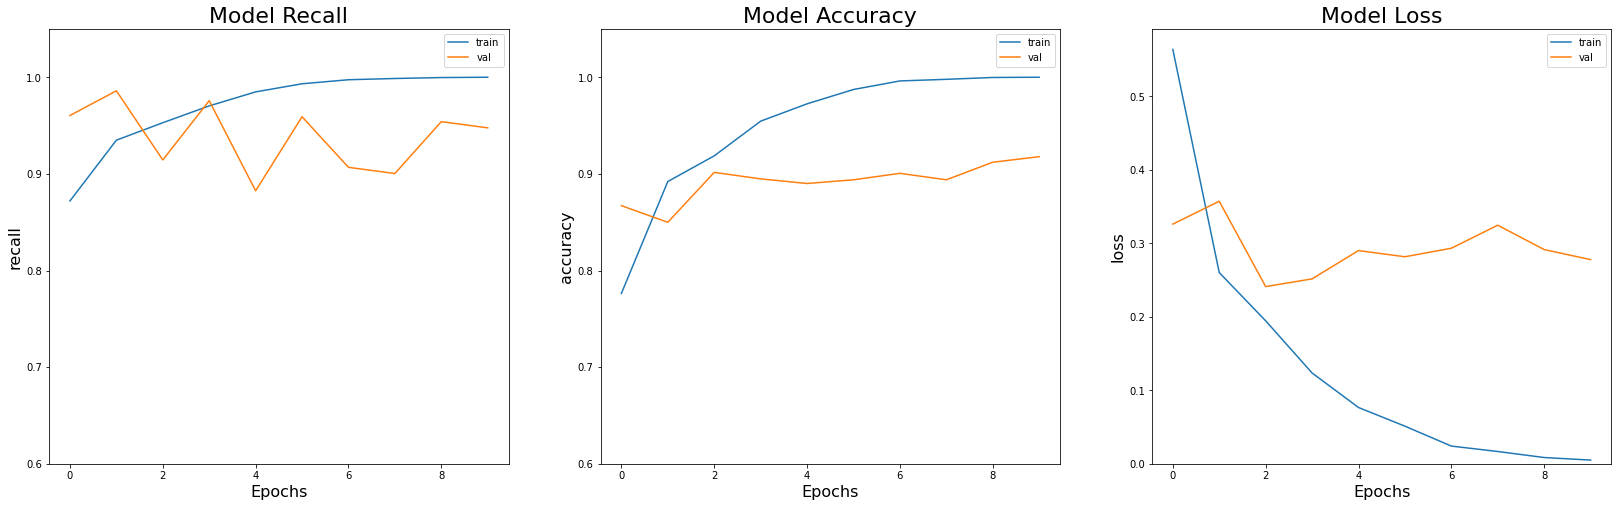

In [31]:
plotting_visualizations(base_tuned_result)

Augmenting the data did not improve the model performance. 

        Runtime = 29.157 seconds
        
        Recall dropped from ~98% to ~94%. 

        Validation Loss has had a considerable increase from 0.0839 to 0.3845

        Accuracy dropped from ~97% to ~89%.


Therefore, Model optimization proceeds with the imbalanced dataset.

### 7.3 Third Model


In [32]:
# instantiating the third model

third_model = Sequential()

In [33]:
# adding layers to the third model

third_model.add(Input(shape=input_shape))

third_model.add(Conv2D(32, (3, 3), activation='relu'))
third_model.add(MaxPooling2D(pool_size=(2, 2)))

third_model.add(Conv2D(32, (3, 3), activation='relu'))
third_model.add(MaxPooling2D(pool_size=(2, 2)))

third_model.add(Conv2D(64, (3, 3), activation='relu'))
third_model.add(MaxPooling2D(pool_size=(2, 2)))

third_model.add(Flatten())
third_model.add(Dense(64, activation='relu'))
third_model.add(Dropout(0.5))

third_model.add(Dense(1, activation='sigmoid'))

In [34]:
# compiling the third model

third_model.compile(optimizer ='adam',
                    loss = "binary_crossentropy",
                    metrics = [tf.keras.metrics.Recall(name = 'recall'), 
                               'accuracy']
                    )

In [35]:
# fit the third model

third_start = time.time()

third_result = third_model.fit(train_images, 
                               train_labels, 
                               epochs = 10, 
                               batch_size = 32, 
                               validation_split = 0.2 
                               )

third_stop = time.time()
print(f'Time taken to fit the baseline model was {round(third_stop - third_start, 3)} seconds')

Epoch 1/10
131/131 [==============================] - 5s 33ms/step - loss: 0.3643 - recall: 0.9529 - accuracy: 0.8335 - val_loss: 0.1758 - val_recall: 0.9936 - val_accuracy: 0.9379
Epoch 2/10
131/131 [==============================] - 4s 29ms/step - loss: 0.1824 - recall: 0.9645 - accuracy: 0.9189 - val_loss: 0.0952 - val_recall: 0.9655 - val_accuracy: 0.9675
Epoch 3/10
131/131 [==============================] - 4s 27ms/step - loss: 0.1595 - recall: 0.9623 - accuracy: 0.9416 - val_loss: 0.0968 - val_recall: 0.9642 - val_accuracy: 0.9637
Epoch 4/10
131/131 [==============================] - 4s 27ms/step - loss: 0.1358 - recall: 0.9681 - accuracy: 0.9498 - val_loss: 0.0836 - val_recall: 0.9898 - val_accuracy: 0.9704
Epoch 5/10
131/131 [==============================] - 4s 27ms/step - loss: 0.1271 - recall: 0.9749 - accuracy: 0.9567 - val_loss: 0.0702 - val_recall: 0.9719 - val_accuracy: 0.9713
Epoch 6/10
131/131 [==============================] - 4s 27ms/step - loss: 0.0987 - recall: 0.9

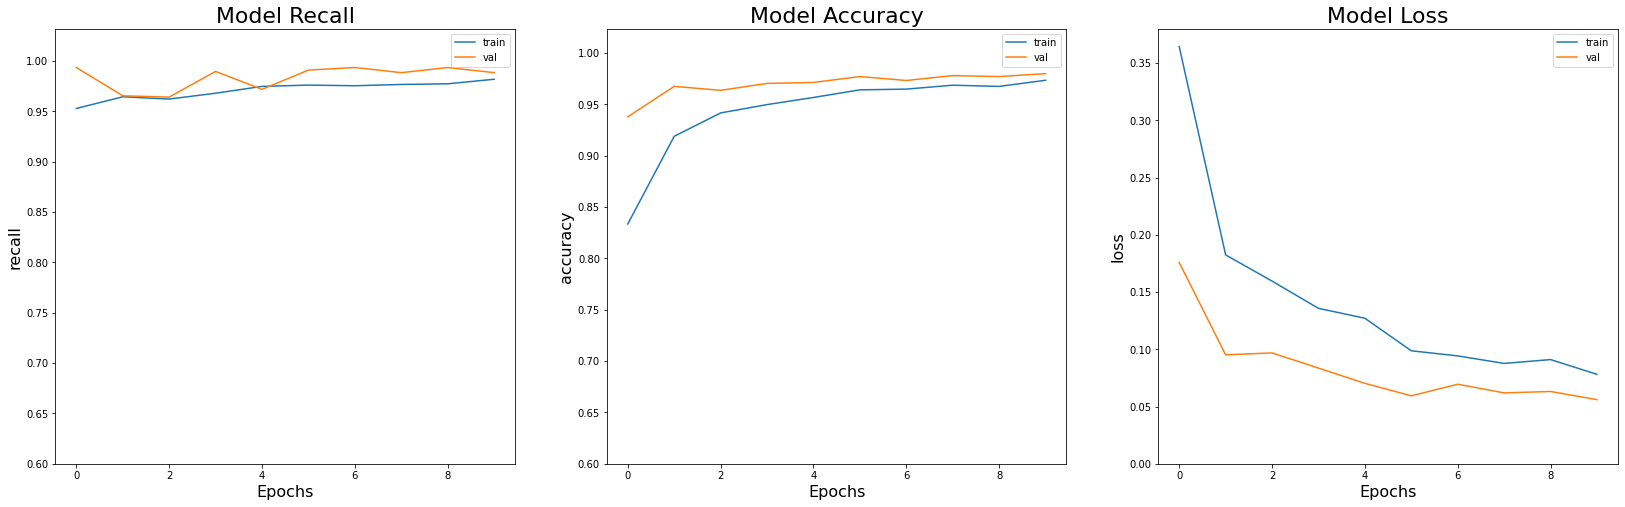

In [36]:
plotting_visualizations(third_result)

This model has a better runtime and scores than the baseline model:

        Runtime = 36.481 seconds

        Recall: Train - ~98%, 
                Validation - ~98%

        loss: Train - 0.0689, 
              Validation - 0.0895

        Accuracy: Train - ~97%, 
                  Validation - ~97%


## Evaluation

From the analysis of the three models, the third model had the shortest runtime and the scores suggest that there is no overfitting or underfitting happening.

Based on that, this is the final model.

In [37]:
# making predictions using the third model

final_model = third_model

final_scores = final_model.evaluate(test_images, test_labels)

# checking the scores 

print('\nThe final recall score is:', final_scores[1])
print('-'*40)
print('The final accuracy score is:', final_scores[2])
print('-'*40)
print('The final loss is:', final_scores[0])


20/20 [==============================] - 0s 18ms/step - loss: 1.4358 - recall: 0.9923 - accuracy: 0.7612

The final recall score is: 0.9923076629638672
----------------------------------------
The final accuracy score is: 0.7612179517745972
----------------------------------------
The final loss is: 1.435766339302063


## Challenging the Solution

A transfer learning model was selected to challenge the final model. 
The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. 

One can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

VGG19 was created by Oxford, and has 19 layers. 


In [38]:
# insantiating the model

vgg_model = tf.keras.applications.VGG19(weights='imagenet', 
                                        include_top = False,
                                        input_shape = input_shape)


80150528/80134624 [==============================] - 1s 0us/step


In [39]:
# freezing the layers

for layer in vgg_model.layers:
    layer.trainable=False

In [40]:
# adding layers

x = vgg_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
# output layer
predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs=vgg_model.input, outputs=predictions)

In [41]:
# to avoid overfitting

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)

In [42]:
# Compiling the model

model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=[tf.keras.metrics.Recall(name = 'recall'), 
                       'accuracy'])

In [43]:
# fitting the model

vgg_start = time.time()

vgg_results = model.fit(train_images ,
                        train_labels,
                        epochs=10, 
                        validation_split = 0.2, 
                        steps_per_epoch=100,
                        callbacks=[early_stopping,lr],
                        batch_size=32)

vgg_stop = time.time()
print(f'Time taken to fit the VGG model was {round(vgg_stop - vgg_start, 3)} seconds')

Epoch 1/10
100/100 [==============================] - 20s 172ms/step - loss: 0.3331 - recall: 0.9685 - accuracy: 0.8578 - val_loss: 0.1991 - val_recall: 0.9770 - val_accuracy: 0.9293 - lr: 0.0010
Epoch 2/10
100/100 [==============================] - 16s 163ms/step - loss: 0.2046 - recall: 0.9531 - accuracy: 0.9162 - val_loss: 0.1545 - val_recall: 0.9757 - val_accuracy: 0.9484 - lr: 0.0010
Epoch 3/10
100/100 [==============================] - 14s 145ms/step - loss: 0.1681 - recall: 0.9596 - accuracy: 0.9310 - val_loss: 0.1395 - val_recall: 0.9847 - val_accuracy: 0.9503 - lr: 0.0010
Epoch 4/10
100/100 [==============================] - 14s 144ms/step - loss: 0.1509 - recall: 0.9666 - accuracy: 0.9407 - val_loss: 0.1181 - val_recall: 0.9808 - val_accuracy: 0.9656 - lr: 0.0010
Epoch 5/10
100/100 [==============================] - 14s 144ms/step - loss: 0.1341 - recall: 0.9696 - accuracy: 0.9491 - val_loss: 0.1080 - val_recall: 0.9860 - val_accuracy: 0.9637 - lr: 0.0010
Epoch 6/10
100/100 [

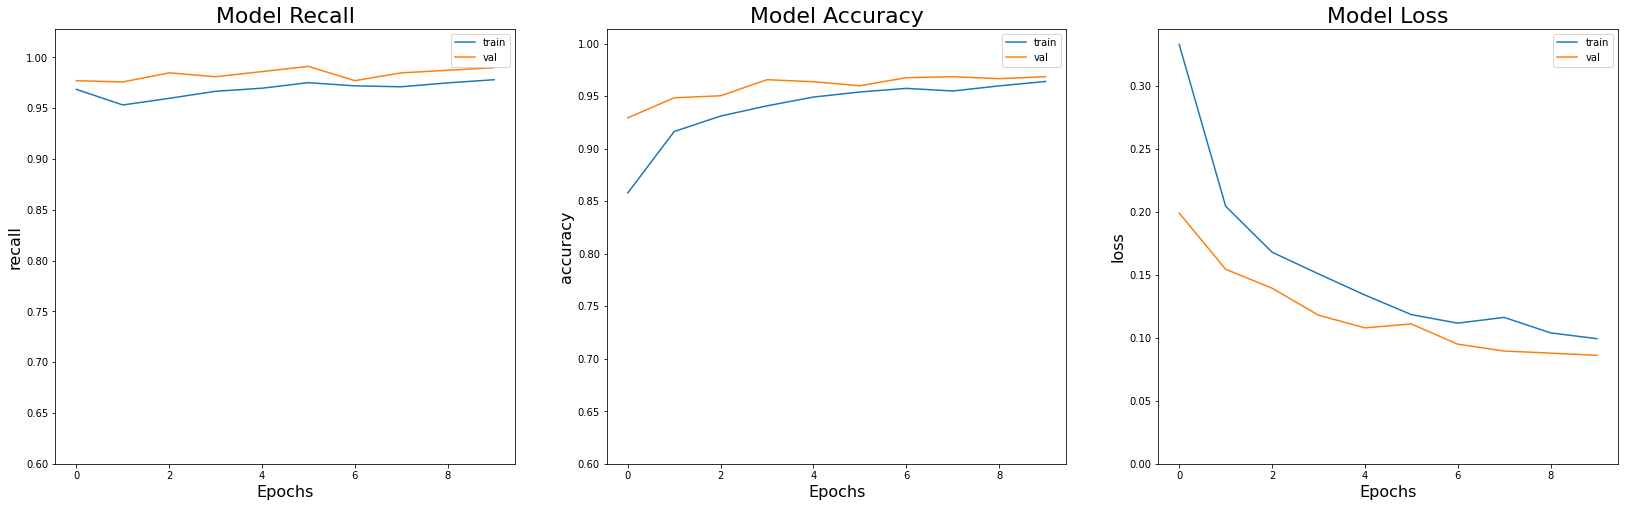

In [44]:
plotting_visualizations(vgg_results)

## Conclusions

The sensitivity of detecting pneumonia by emergency medicine specialists and radiologists [according to this paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6377225/#:~:text=Sensitivity%20of%20plain%20chest%20radiography,radiation%20(9%2C%2010)) is 83%,  therefore: 
- Given that the model has  98% sensitivity, interpretation of chest x-rays using this Convolutional Algorithm  might help in improving the diagnostic accuracy of pneumonia.
- The algorithm is fast (36s) hence will increase efficiency in a given hospital.

## Recommendations

The model can be deployed for use in a hospital setting. However, this is from a purely technical standpoint as no medical expert or body has evaluated the model and signed it off as approved to be used in any hospital